# Machine Learning with `scikit-learn`
* With Jupyter
* This notebook should be compatible with python 2 and 3

## Machine Learning 101

It's said in different ways, but I like the way Jake VanderPlas defines ML:

> Machine Learning can be considered a <b>subfield of Artificial Intelligence</b> since those algorithms can be seen as building blocks to make computers learn to behave more intelligently by somehow <b>generalizing</b> rather that just storing and retrieving data items like a database system would do.

<font color = "grey">He goes on to say:

"Machine Learning is about building <b>programs with tunable parameters</b> (typically an array of floating point values) that are adjusted automatically so as to improve their behavior by <b>adapting to previously seen data</b>."<br><br>


(more [here](http://www.astroml.org/sklearn_tutorial/general_concepts.html))<br><br>

ML is much more than writing a program.  ML experts write clever and robust algorithms which can generalize to answer different, but specific questions.  There are still types of questions that a certain algorithm can not or should not be used to answer.  I say answer instead of solve, because even with an answer one should evaluate whether it is a good answer or bad answer.  Also, just an in statistics, one needs to be careful about assumptions and limitations of an algorithm and the subsequent model that is built from it.</font>

<br><br>Here's my hand-drawn diagram of the machine learning process.<br>

<img src='imgs/ml_process_by_micheleenharris.png' alt="Smiley face" width="550">
<br><br>


### First example
Below, we are going to show a simple case of <i>classification</i> in a picture.  <br><br>

<font color = "grey">

In the figure we show a collection of 2D data, colored by their class labels (imagine one class is labeled "red" and the other "blue").
The `fig_code` module is credited to Jake VanderPlas and was cloned from his github repo [here](https://github.com/jakevdp/sklearn_pycon2015) - also on our repo is his license file since he asked us to include that if we use his source code. :)</font>

In [5]:
# Imports for python 2/3 compatibility

from __future__ import absolute_import, division, print_function, unicode_literals

# For python 2, comment these out:
# from builtins import range

In [ ]:
# Plot settings for notebook

# so that plots show up in notebook
%matplotlib inline
import matplotlib.pyplot as plt

# suppress future warning (some code is borrowed/adapted)
import warnings
warnings.filterwarnings('ignore')

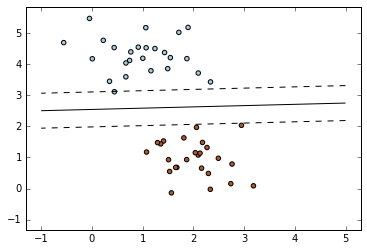

In [6]:
# Import an example plot from the figures directory
from fig_code import plot_sgd_separator
plot_sgd_separator()

Above is the vector which best separates the two classes, "red" and "blue" using a classification algorithm called Stochastic Gradient Decent (don't worry about the detail yet).  The confidence intervals are shown as dashed lines.<br><br>

<font color = "grey">
This demonstrates a very important aspect of ML and that is the algorithm is <i>generalizable</i>, i.e., if we add some new data, a new point, the algorithm can <i>predict</i> whether is should be in the "red" or "blue" category.
</font><br><br>
Here are some details of the code used above:

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

# we create 50 separable points
X, y = make_blobs(n_samples=50, centers=2,
                      random_state=0, cluster_std=0.60)

# what's in X and what's in y??
print(X[0:10,:])
print(y[0:10])

target_names = np.array(['blue', 'red']) # <-- what am I naming here?

In [ ]:
clf = SGDClassifier(loss="hinge", alpha=0.01,
                    max_iter=200, fit_intercept=True)

# fit the model -> more details later
clf.fit(X, y)

Add some of your own data and make a prediction in the cell below.

Data could be a single x, y point or array of x, y points. e.g. `[[0, 5]]`

In [ ]:
X_test = [] # <-- your data here (as 2D array)
y_pred = clf.predict(___) # <-- what goes here?

# predictions (decode w/ target names list)
target_names[y_pred]


> <b>ML TIP:  ML can only answer 5 questions:</b>
* How much/how many?
* Which category?
* Which group?
* Is it weird?
* Which action?

<p style="text-align:right"><i>explained well by Brandon Rohrer [here]((https://channel9.msdn.com/blogs/Cloud-and-Enterprise-Premium/Data-Science-for-Rest-of-Us)</i></p>

As far as algorithms for learning a model (i.e. running some training data through an algorithm), it's nice to think of them in two different ways (with the help of the [machine learning wikipedia article](https://en.wikipedia.org/wiki/Machine_learning)).  

The first way of thinking about ML, is by the type of information or **<i>input</i>** given to a system.  So, given that criteria there are three classical categories:
1.  Supervised learning - we get the data and the labels
2.  Unsupervised learning - only get the data (no labels)
3.  Reinforcement learning - reward/penalty based information (feedback)

Another way of categorizing ML approaches, is to think of the desired **<i>output</i>**:
1.  Classification
2.  Regression
3.  Clustering
4.  Density estimation
5.  Dimensionality reduction

--> This second approach (by desired <i>output</i>) is how `sklearn` categorizes it's ML algorithms.<br><br>

<font color = "lightgrey">

The problem solved in supervised learning (e.g. classification, regression)

Supervised learning consists of learning the link between two datasets: the observed data X and an external variable y that we are trying to predict, usually called “target” or “labels”. Most often, y is a 1D array of length n_samples.
</font><br><br>

All supervised estimators in `sklearn` implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations X, returns the predicted labels y.<br><br>

<font color = "lightgrey">
Common algorithms you will use to train a model and then use trying to predict the labels of unknown observations are: <b>classification</b> and <b>regression</b>.  There are many types of classification and regression (for examples check out the `sklearn` algorithm cheatsheet below).

The problem solved in <i>un</i>supervised learning (e.g. dimensionality reduction, clustering)
In machine learning, the problem of unsupervised learning is that of trying to find <b>hidden structure</b> in unlabeled data.
</font><br><br>
Unsupervised models have a `fit()`, `transform()` and/or `fit_transform()` in `sklearn`.

#### There are some instances where ML is just not needed or appropriate for solving a problem.
Some examples are pattern matching (e.g. regex), group-by and data mining in general (discovery vs. prediction).

#### EXERCISE: Should I use ML or can I get away with something else?

* Looking back at previous years, by what percent did housing prices increase over each decade?<br>
* Looking back at previous years, and given the relationship between housing prices and mean income in my area, given my income how much will a house be in two years in my area?<br>
* A vacuum like roomba has to make a decision to vacuum the living room again or return to its base.<br>
* Is this image a cat or dog?<br>
* Are orange tabby cats more common than other breeds in Austin, Texas?<br>
* Using my database on housing prices, group my housing prices by whether or not the house is under 10 miles from a school.<br>
* What is the weather going to be like tomorrow?<br>
* What is the purpose of life?

## A very brief introduction to scikit-learn (aka `sklearn`)

As a gentle intro, it is helpful to think of the `sklearn` approach having layers of abstraction.  This famous quote certainly applies:

> Easy reading is damn hard writing, and vice versa. <br>
--Nathaniel Hawthorne

In `sklearn`, you'll find you have a common programming choice: to do things very explicitly, e.g. pre-process data one step at a time, perhaps do a transformation like PCA, split data into traning and test sets, define a classifier or learner with desired parameters, train the classifier, use the classifier to predict on a test set and then analyze how good it did.  

A different approach and something `sklearn` offers is to combine some or all of the steps above into a pipeline so to speak.  For instance, one could define a pipeline which does all of these steps at one time and perhaps even pits mutlple learners against one another or does some parameter tuning with a grid search (examples will be shown towards the end).  This is what is meant here by layers of abstraction.<br><br>
<font color = "lightgrey">
So, in this particular module, for the most part, we will try to be explicit regarding our process and give some useful tips on options for a more automated or pipelined approach.  Just note, once you've mastered the explicit approaches you might want to explore `sklearn`'s `GridSearchCV` and `Pipeline` classes.
</font><br><br>
Here is `sklearn`'s algorithm diagram - (note, this is not an exhaustive list of model options offered in `sklearn`, but serves as a good algorithm guide).  The interactive version is [here](http://scikit-learn.org/stable/tutorial/machine_learning_map/).
![](imgs/ml_map.png)

### Your first model - a quick multiclass logistic regression
* `sklearn` comes with many datasets ready-to-go for `sklearn`'s algorithms like the `iris` data set
* In the next module we'll explore the `iris` dataset in detail
---
Below, notice some methods like *`fit`, `predict` and `predict_proba`*.  Many of the classifiers you'll see will share method names like these.  (Note this is a supervised learning classifier)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

# Leave one value out from training set - that will be test later on
X_train, y_train = iris.data[:-1,:], iris.target[:-1]

In [ ]:
from sklearn.linear_model import LogisticRegression

# our model - a multiclass regression
logistic = LogisticRegression()

# train on iris training set
logistic.fit(X_train, y_train)

# place data in array of arrays (1D -> 2D)
X_test = iris.data[-1,:].reshape(1, -1)

y_predict = logistic.predict(X_test)

print('Predicted class %s, real class %s' % (
 y_predict, iris.target[-1]))

print('Probabilities of membership in each class: %s' % 
      logistic.predict_proba(X_test))

QUESTION:
* What would have been good to do before plunging right in to a logistic regression model?

#### Some terms you will encounter as a Machine Learnest

Term  | Definition
------------- | -------------
Training set  | set of data used to learn a model
Test set  | set of data used to test a model
Feature  | a variable (continuous, discrete, categorical, etc.) aka column
Target  | Label (associated with dependent variable, what we predict)
Learner  | Model or algorithm
Fit, Train | learn a model with an ML algorithm using a training set
Predict | w/ supervised learning, give a label to an unknown datum(data), w/ unsupervised decide if new data is weird, in which group, or what to do next with the new data
Accuracy | percentage of correct predictions ((TP + TN) / total)
Precision | percentage of correct positive predictions (TP / (FP + TP))
Recall | percentage of positive cases caught (TP / (FN + TP))

> PRO TIP: Are you a statistician?  Want to talk like a machine learning expert?  Here you go (from the friendly people at SAS ([here](http://www.sas.com/it_it/insights/analytics/machine-learning.html))): 

A Statistician Would Say  | A Machine Learnest Would Say
------------- | -------------
dependent variable  | target
variable  | feature
transformation  | feature creation


Created by a Microsoft Employee.
	
The MIT License (MIT)<br>
Copyright (c) 2016 Micheleen Harris